In [ ]:
from google.colab import files
import json

# Dosya yükleme arayüzünü aç
uploaded = files.upload()

# Yüklenen dosya adını al
file_name = list(uploaded.keys())[0]

# Verileri oku
titles = []
abstracts = []
with open(file_name, 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        titles.append(data['title'])
        abstracts.append(data['abstract'])

print(f"{len(titles)} doküman yüklendi")

Saving arxive_10.json to arxive_10.json
Saving arxive_150.json to arxive_150.json
9 doküman yüklendi


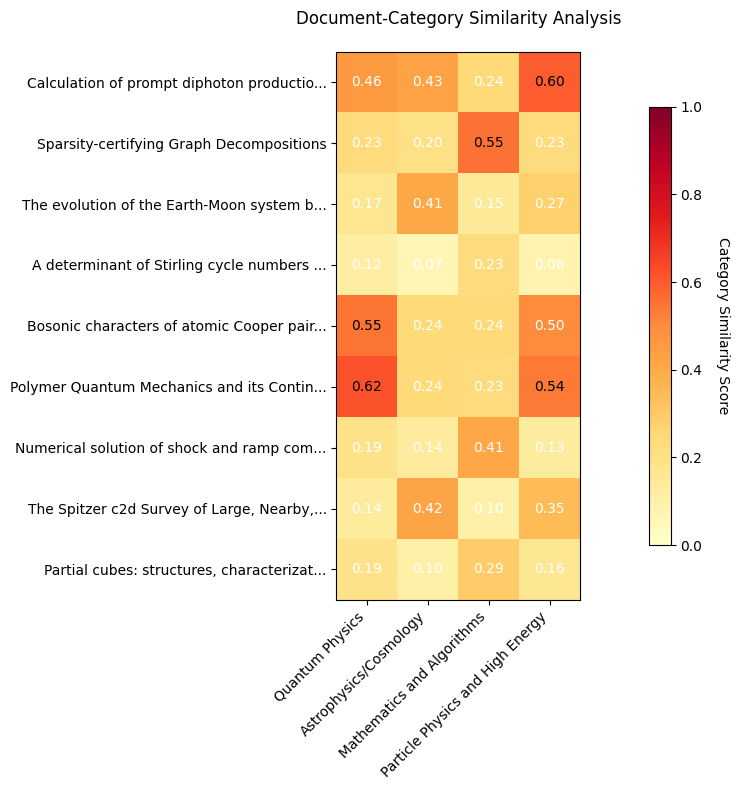


Documents with their most similar categories:

- Calculation of prompt diphoton production cross sections at ...
  Most similar to: Particle Physics and High Energy (score: 0.596)

- Sparsity-certifying Graph Decompositions...
  Most similar to: Mathematics and Algorithms (score: 0.554)

- The evolution of the Earth-Moon system based on the dark mat...
  Most similar to: Astrophysics/Cosmology (score: 0.408)

- A determinant of Stirling cycle numbers counts unlabeled acy...
  Most similar to: Mathematics and Algorithms (score: 0.233)

- Bosonic characters of atomic Cooper pairs across resonance...
  Most similar to: Quantum Physics (score: 0.550)

- Polymer Quantum Mechanics and its Continuum Limit...
  Most similar to: Quantum Physics (score: 0.617)

- Numerical solution of shock and ramp compression for general...
  Most similar to: Mathematics and Algorithms (score: 0.412)

- The Spitzer c2d Survey of Large, Nearby, Insterstellar Cloud...
  Most similar to: Astrophysics/Cosmology (

In [27]:
# !pip install -U sentence-transformers matplotlib numpy scikit-learn

from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import json

# Kategoriler ve örnek anahtar kelimeler (İngilizce)
CATEGORIES = {
    "Quantum Physics": ["quantum mechanics", "wave function", "Schrödinger equation", "quantum entanglement"],
    "Astrophysics/Cosmology": ["cosmology", "dark matter", "black hole", "big bang"],
    "Mathematics and Algorithms": ["algorithm", "mathematical model", "optimization", "computational"],
    "Particle Physics and High Energy": ["particle physics", "CERN", "Higgs boson", "quantum field theory"]
}

# Model yükleme
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def load_data_from_json(file_path):
    titles = []
    abstracts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            titles.append(data['title'])
            abstracts.append(data['abstract'])
    return titles, abstracts

# Veriyi yükle
titles, abstracts = load_data_from_json('arxive_10.json')
documents = [f"{title}. {abstract}" for title, abstract in zip(titles, abstracts)]

# Doküman embedding'lerini oluştur
doc_embeddings = model.encode(documents)

# Kategori embedding'lerini oluştur (her kategori için anahtar kelimelerin ortalaması)
category_embeddings = {}
for category, keywords in CATEGORIES.items():
    keyword_embeddings = model.encode(keywords)
    category_embeddings[category] = np.mean(keyword_embeddings, axis=0)

# Her dokümanın her kategoriyle benzerliğini hesapla
similarity_results = np.zeros((len(documents), len(CATEGORIES)))
for i, doc_embedding in enumerate(doc_embeddings):
    for j, (category, cat_embedding) in enumerate(category_embeddings.items()):
        similarity_results[i, j] = cosine_similarity([doc_embedding], [cat_embedding])[0][0]

# Görselleştirme
plt.figure(figsize=(14, 8))

heatmap = plt.imshow(similarity_results, cmap="YlOrRd", vmin=0, vmax=1)
cbar = plt.colorbar(heatmap, shrink=0.8)
cbar.set_label('Category Similarity Score', rotation=270, labelpad=20)

plt.xticks(np.arange(len(CATEGORIES)), list(CATEGORIES.keys()), rotation=45, ha="right")
plt.yticks(np.arange(len(titles)), [title[:40] + '...' if len(title) > 40 else title for title in titles])

for i in range(len(documents)):
    for j in range(len(CATEGORIES)):
        plt.text(j, i, f"{similarity_results[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if similarity_results[i, j] < 0.5 else "black")

plt.title("Document-Category Similarity Analysis", pad=20)
plt.tight_layout()
plt.show()

# döküman vs kategori
print("\nDocuments with their most similar categories:")
for i, title in enumerate(titles):
    best_cat_idx = np.argmax(similarity_results[i])
    best_cat = list(CATEGORIES.keys())[best_cat_idx]
    best_score = similarity_results[i, best_cat_idx]
    print(f"\n- {title[:60]}...")
    print(f"  Most similar to: {best_cat} (score: {best_score:.3f})")

Similarity Matrix:
[[1.   0.2  0.2  0.16 0.47 0.43 0.2  0.34 0.12]
 [0.2  1.   0.12 0.29 0.21 0.23 0.23 0.08 0.43]
 [0.2  0.12 1.   0.15 0.2  0.15 0.18 0.37 0.02]
 [0.16 0.29 0.15 1.   0.15 0.2  0.03 0.13 0.17]
 [0.47 0.21 0.2  0.15 1.   0.43 0.27 0.3  0.27]
 [0.43 0.23 0.15 0.2  0.43 1.   0.25 0.08 0.33]
 [0.2  0.23 0.18 0.03 0.27 0.25 1.   0.11 0.2 ]
 [0.34 0.08 0.37 0.13 0.3  0.08 0.11 1.   0.11]
 [0.12 0.43 0.02 0.17 0.27 0.33 0.2  0.11 1.  ]]


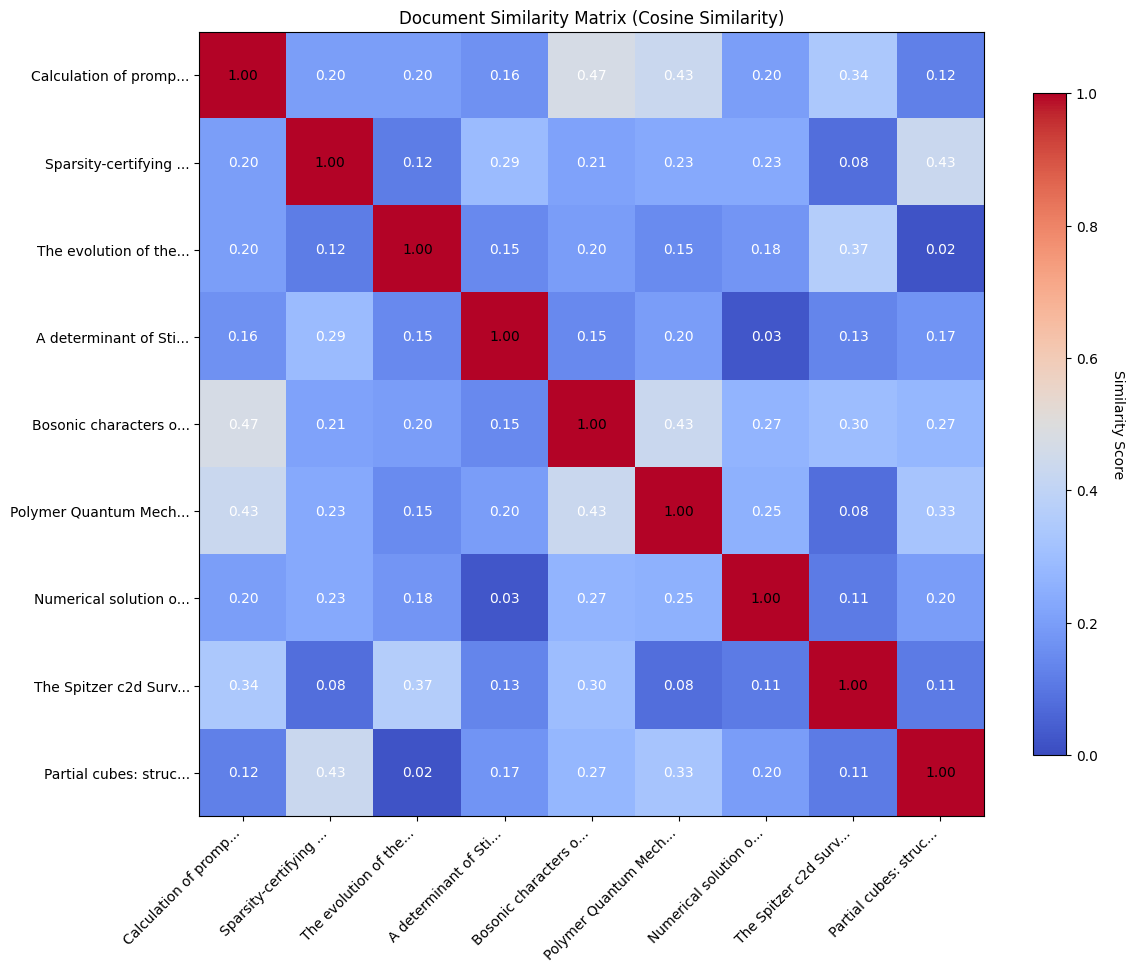

In [ ]:
# !pip install -U sentence-transformers matplotlib numpy scikit-learn

from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import json

# Load the model
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Function to read JSON file and extract titles and abstracts
def load_data_from_json(file_path):
    titles = []
    abstracts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            titles.append(data['title'])
            abstracts.append(data['abstract'])
    return titles, abstracts

# Load your data (replace 'your_data.json' with your actual file path)
titles, abstracts = load_data_from_json('arxive_10.json')

# Combine titles and abstracts for embedding (you could also process them separately)
documents = [f"{title}. {abstract}" for title, abstract in zip(titles, abstracts)]

# Generate embeddings for all documents
embeddings = model.encode(documents)

# Calculate similarity matrix (cosine similarity)
similarity_matrix = cosine_similarity(embeddings)

# Print similarity matrix
print("Similarity Matrix:")
print(np.round(similarity_matrix, 2))  # Round to 2 decimal places

# Create heatmap
plt.figure(figsize=(12, 10))
heatmap = plt.imshow(similarity_matrix, cmap="coolwarm", vmin=0, vmax=1)

# Add color bar
cbar = plt.colorbar(heatmap, shrink=0.8)
cbar.set_label('Similarity Score', rotation=270, labelpad=20)

# Set axis labels (using first 20 chars of titles for display)
short_labels = [title[:20] + '...' if len(title) > 20 else title for title in titles]
plt.xticks(np.arange(len(short_labels)), short_labels, rotation=45, ha='right')
plt.yticks(np.arange(len(short_labels)), short_labels)
plt.title("Document Similarity Matrix (Cosine Similarity)")

# Add values to cells
for i in range(len(documents)):
    for j in range(len(documents)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if similarity_matrix[i, j] < 0.5 else "black")

plt.tight_layout()
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import json
import time
import numpy as np

# Model listesi
MODELS = {
    'paraphrase-multilingual-MiniLM-L12-v2': 'Çok dilli, hızlı, orta seviye kalite',
    'all-mpnet-base-v2': 'Yüksek kaliteli İngilizce modeli',
    'paraphrase-multilingual-mpnet-base-v2': 'Çok dilli yüksek kaliteli model',
    'distiluse-base-multilingual-cased-v2': 'Çok dilli, distil (küçültülmüş) model',
    'stsb-xlm-r-multilingual': 'XLM-R tabanlı çok dilli model',
    'LaBSE': 'Diller arası vektör uzayında iyi performans',
}

# Test sorguları ve beklenen sonuçlar
TEST_QUERIES = [
    {
        "query": "superconductivity Cooper pairs quantum mechanics",
        "expected": "Bosonic characters of atomic Cooper pairs across resonance",
        "name": "Test 1: Süperiletkenlik"
    },
    {
        "query": "quantum mechanics continuous limit polymer physics",
        "expected": "Polymer Quantum Mechanics and its Continuum Limit",
        "name": "Test 2: Polimer Kuantum Mekaniği"
    }
]

def load_model(model_name):
    print(f"\nLoading model: {model_name}")
    print(f"Model açıklaması: {MODELS[model_name]}")
    start_time = time.time()
    model = SentenceTransformer(f'sentence-transformers/{model_name}')
    load_time = time.time() - start_time
    print(f"Model yüklendi. Süre: {load_time:.2f} saniye")
    return model

def load_data_from_json(file_path):
    titles = []
    abstracts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            titles.append(data['title'])
            abstracts.append(data['abstract'])
    return titles, abstracts

def find_most_similar(query_embedding, doc_embeddings, titles):
    similarities = cosine_similarity([query_embedding], doc_embeddings)[0]
    top_index = np.argmax(similarities)
    return titles[top_index], similarities[top_index]

def run_tests(model, model_name, documents, titles, doc_embeddings):
    print(f"\nModel: {model_name} ile testler çalışıyor...")

    for test in TEST_QUERIES:
        query = test["query"]
        expected = test["expected"]

        # Sorgu için embedding oluştur
        query_embedding = model.encode(query)

        # En benzer dokümanı bul
        most_similar_title, similarity_score = find_most_similar(query_embedding, doc_embeddings, titles)

        # Sonuçları yazdır
        print(f"\n{test['name']}")
        print(f"Arama cümlesi: '{query}'")
        print(f"Beklenen sonuç: '{expected}'")
        print(f"Bulunan sonuç: '{most_similar_title}'")
        print(f"Benzerlik skoru: {similarity_score:.4f}")

        # Beklenen sonuç doğru mu kontrol et
        if expected in most_similar_title:
            print("✅ Beklenen sonuç bulundu!")
        else:
            print("❌ Beklenen sonuç bulunamadı!")

# Veriyi yükle
titles, abstracts = load_data_from_json('arxive_10.json')
documents = [f"{title}. {abstract}" for title, abstract in zip(titles, abstracts)]

# Tüm modelleri test et
for model_name in MODELS:
    try:
        model = load_model(model_name)

        # Tüm dokümanlar için embedding oluştur
        start_time = time.time()
        doc_embeddings = model.encode(documents)
        print(f"Embedding oluşturma süresi: {time.time() - start_time:.2f} saniye")

        # Testleri çalıştır
        run_tests(model, model_name, documents, titles, doc_embeddings)

    except Exception as e:
        print(f"{model_name} modelinde hata oluştu: {str(e)}")


Loading model: paraphrase-multilingual-MiniLM-L12-v2
Model açıklaması: Çok dilli, hızlı, orta seviye kalite
Model yüklendi. Süre: 5.78 saniye
Embedding oluşturma süresi: 4.21 saniye

Model: paraphrase-multilingual-MiniLM-L12-v2 ile testler çalışıyor...

Test 1: Süperiletkenlik
Arama cümlesi: 'superconductivity Cooper pairs quantum mechanics'
Beklenen sonuç: 'Bosonic characters of atomic Cooper pairs across resonance'
Bulunan sonuç: 'Bosonic characters of atomic Cooper pairs across resonance'
Benzerlik skoru: 0.5445
✅ Beklenen sonuç bulundu!

Test 2: Polimer Kuantum Mekaniği
Arama cümlesi: 'quantum mechanics continuous limit polymer physics'
Beklenen sonuç: 'Polymer Quantum Mechanics and its Continuum Limit'
Bulunan sonuç: 'Polymer Quantum Mechanics and its Continuum Limit'
Benzerlik skoru: 0.7744
✅ Beklenen sonuç bulundu!

Loading model: all-mpnet-base-v2
Model açıklaması: Yüksek kaliteli İngilizce modeli
Model yüklendi. Süre: 1.22 saniye
Embedding oluşturma süresi: 19.15 saniye

Mode

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import json
import time
import numpy as np

# Model listesi
MODELS = {
    'paraphrase-multilingual-MiniLM-L12-v2': 'Çok dilli, hızlı, orta seviye kalite',
    'all-mpnet-base-v2': 'Yüksek kaliteli İngilizce modeli',
    'paraphrase-multilingual-mpnet-base-v2': 'Çok dilli yüksek kaliteli model',
    'distiluse-base-multilingual-cased-v2': 'Çok dilli, distil (küçültülmüş) model',
    'stsb-xlm-r-multilingual': 'XLM-R tabanlı çok dilli model',
    'LaBSE': 'Diller arası vektör uzayında iyi performans',
}

# Test sorguları ve beklenen sonuçlar
TEST_QUERIES = [
    {
        "query": "süper iletkenlik Cooper çiftleri kuantum mekaniği",
        "expected": "Bosonic characters of atomic Cooper pairs across resonance",
        "name": "Test 1: Süperiletkenlik"
    },
    {
        "query": "kuantum mekaniği sürekli limit polimer fiziği",
        "expected": "Polymer Quantum Mechanics and its Continuum Limit",
        "name": "Test 2: Polimer Kuantum Mekaniği"
    }
]

def load_model(model_name):
    print(f"\nLoading model: {model_name}")
    print(f"Model açıklaması: {MODELS[model_name]}")
    start_time = time.time()
    model = SentenceTransformer(f'sentence-transformers/{model_name}')
    load_time = time.time() - start_time
    print(f"Model yüklendi. Süre: {load_time:.2f} saniye")
    return model

def load_data_from_json(file_path):
    titles = []
    abstracts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            titles.append(data['title'])
            abstracts.append(data['abstract'])
    return titles, abstracts

def find_most_similar(query_embedding, doc_embeddings, titles):
    similarities = cosine_similarity([query_embedding], doc_embeddings)[0]
    top_index = np.argmax(similarities)
    return titles[top_index], similarities[top_index]

def run_tests(model, model_name, documents, titles, doc_embeddings):
    print(f"\nModel: {model_name} ile testler çalışıyor...")

    for test in TEST_QUERIES:
        query = test["query"]
        expected = test["expected"]

        # Sorgu için embedding oluştur
        query_embedding = model.encode(query)

        # En benzer dokümanı bul
        most_similar_title, similarity_score = find_most_similar(query_embedding, doc_embeddings, titles)

        # Sonuçları yazdır
        print(f"\n{test['name']}")
        print(f"Arama cümlesi: '{query}'")
        print(f"Beklenen sonuç: '{expected}'")
        print(f"Bulunan sonuç: '{most_similar_title}'")
        print(f"Benzerlik skoru: {similarity_score:.4f}")

        # Beklenen sonuç doğru mu kontrol et
        if expected in most_similar_title:
            print("✅ Beklenen sonuç bulundu!")
        else:
            print("❌ Beklenen sonuç bulunamadı!")

# Veriyi yükle
titles, abstracts = load_data_from_json('arxive_10.json')
documents = [f"{title}. {abstract}" for title, abstract in zip(titles, abstracts)]

# Tüm modelleri test et
for model_name in MODELS:
    try:
        model = load_model(model_name)

        # Tüm dokümanlar için embedding oluştur
        start_time = time.time()
        doc_embeddings = model.encode(documents)
        print(f"Embedding oluşturma süresi: {time.time() - start_time:.2f} saniye")

        # Testleri çalıştır
        run_tests(model, model_name, documents, titles, doc_embeddings)

    except Exception as e:
        print(f"{model_name} modelinde hata oluştu: {str(e)}")


Loading model: paraphrase-multilingual-MiniLM-L12-v2
Model açıklaması: Çok dilli, hızlı, orta seviye kalite
Model yüklendi. Süre: 2.94 saniye
Embedding oluşturma süresi: 1.28 saniye

Model: paraphrase-multilingual-MiniLM-L12-v2 ile testler çalışıyor...

Test 1: Süperiletkenlik
Arama cümlesi: 'süper iletkenlik Cooper çiftleri kuantum mekaniği'
Beklenen sonuç: 'Bosonic characters of atomic Cooper pairs across resonance'
Bulunan sonuç: 'Bosonic characters of atomic Cooper pairs across resonance'
Benzerlik skoru: 0.6212
✅ Beklenen sonuç bulundu!

Test 2: Polimer Kuantum Mekaniği
Arama cümlesi: 'kuantum mekaniği sürekli limit polimer fiziği'
Beklenen sonuç: 'Polymer Quantum Mechanics and its Continuum Limit'
Bulunan sonuç: 'Polymer Quantum Mechanics and its Continuum Limit'
Benzerlik skoru: 0.7291
✅ Beklenen sonuç bulundu!

Loading model: all-mpnet-base-v2
Model açıklaması: Yüksek kaliteli İngilizce modeli
Model yüklendi. Süre: 0.94 saniye
Embedding oluşturma süresi: 13.61 saniye

Model: a

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import json
from transformers import AutoTokenizer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model_mpnet = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def chunk_text(text, max_tokens=350):
    tokens = tokenizer.encode(text, truncation=False, add_special_tokens=False)
    chunks = []
    current_chunk = []
    current_token_count = 0

    for token in tokens:
        current_chunk.append(token)
        current_token_count += 1

        if current_token_count >= max_tokens:
            chunk_text = tokenizer.decode(current_chunk)

            # Son anlamlı bölünme noktasını bul (whitespace veya noktalama)
            last_split_pos = max(
                chunk_text.rfind(' '),
                chunk_text.rfind('.'),
                chunk_text.rfind(','),
                chunk_text.rfind('\n')
            )

            if last_split_pos > 0:
                # Chunk'ı son bölünme noktasına göre ayır
                meaningful_chunk = chunk_text[:last_split_pos].strip()
                remaining_text = chunk_text[last_split_pos:].strip()

                chunks.append(meaningful_chunk)
                current_chunk = tokenizer.encode(remaining_text, add_special_tokens=False)
                current_token_count = len(current_chunk)
            else:
                # Bölünme noktası yoksa, mecbur token sınırından böl
                chunks.append(chunk_text)
                current_chunk = []
                current_token_count = 0

    if current_chunk:
        chunks.append(tokenizer.decode(current_chunk))

    return chunks

def load_data_from_json(file_path):
    titles = []
    abstracts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            titles.append(data['title'])
            abstracts.append(data['abstract'])
    return titles, abstracts



"""document_embeddings = []
for title, abstract in zip(titles, abstracts):
    text = f"{title}. {abstract}"
    chunks = chunk_text(text)
    chunk_embeddings = model.encode(chunks)
    doc_embedding = np.mean(chunk_embeddings, axis=0)
    document_embeddings.append(doc_embedding)

embeddings = np.array(document_embeddings)"""

titles, abstracts = load_data_from_json('arxive_150.json')
documents = [f"{title}. {abstract}" for title, abstract in zip(titles, abstracts)]

document_embeddings = []
document_embeddings_mpnet = []

for title, abstract in zip(titles, abstracts):
    text = f"{title}. {abstract}"
    chunks = chunk_text(text)

    # İlk model ile embedding
    chunk_embeddings = model.encode(chunks)
    doc_embedding = np.mean(chunk_embeddings, axis=0)
    document_embeddings.append(doc_embedding)

    # İkinci model ile embedding
    chunk_embeddings_mpnet = model_mpnet.encode(chunks)
    doc_embedding_mpnet = np.mean(chunk_embeddings_mpnet, axis=0)
    document_embeddings_mpnet.append(doc_embedding_mpnet)

embeddings = np.array(document_embeddings)
embeddings_mpnet = np.array(document_embeddings_mpnet)
# similarity_matrix = cosine_similarity(embeddings)



Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
def basic_keyword_search(query, documents, titles=None, top_k=5):
    """
    Basit anahtar kelime arama
    - query: Arama sorgusu (örn. "yapay zeka")
    - documents: Arama yapılacak doküman listesi
    - titles: Başlık listesi (opsiyonel)
    - top_k: Kaç sonuç döneceği
    """
    query = query.lower()
    results = []

    for i, doc in enumerate(documents):
        if query in doc.lower():
            title = titles[i] if titles else f"Doküman {i+1}"
            results.append({
                'position': i,
                'title': title,
                'content': doc[:500] + "..."  # İlk 150 karakter
            })
            if len(results) >= top_k:
                break

    return results

# TEST
search_query = "high energy gamma ray emissions"
results = basic_keyword_search(search_query, documents, titles)

print(f"Arama: '{search_query}'\nBulunan {len(results)} sonuç:")
for i, res in enumerate(results, 1):
    print(f"\n{i}. {res['title']}")
    print(res['content'])

Arama: 'high energy gamma ray emissions'
Bulunan 0 sonuç:


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Modelleri yükle
model_minilm = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model_mpnet = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

def search_with_minilm(query_text, documents, embeddings, top_k=5):
    """MiniLM modeli ile arama yapar"""
    query_embedding = model_minilm.encode(query_text)
    similarities = cosine_similarity([query_embedding], embeddings)[0]

    sorted_indices = np.argsort(similarities)[::-1][:top_k]

    results = []
    for idx in sorted_indices:
        results.append({
            'document': documents[idx],
            'similarity': float(similarities[idx]),
            'title': titles[idx] if 'titles' in globals() else f"Doküman {idx+1}"
        })
    return results

def search_with_mpnet(query_text, documents, embeddings, top_k=5):
    """MPNet modeli ile arama yapar"""
    query_embedding = model_mpnet.encode(query_text)
    similarities = cosine_similarity([query_embedding], embeddings)[0]

    sorted_indices = np.argsort(similarities)[::-1][:top_k]

    results = []
    for idx in sorted_indices:
        results.append({
            'document': documents[idx],
            'similarity': float(similarities[idx]),
            'title': titles[idx] if 'titles' in globals() else f"Doküman {idx+1}"
        })
    return results

def print_results(results, model_name):
    """Sonuçları yazdır"""
    print(f"\n{model_name} Modeli Sonuçları:")
    print("-" * 60)
    for i, res in enumerate(results, 1):
        print(f"{i:2d}. Benzerlik: {res['similarity']:.4f}")
        print(f"    Başlık: {res['title']}")

if __name__ == "__main__":
    search_query = "astronomik kaynaklardan yüksek enerjili gama ışını emisyonları"

    # Hangi modelin test edileceğini burada seçebilirsiniz
    test_model = "minilm"  # "minilm" veya "mpnet" olarak değiştirin
    top_k_value = 5
    if test_model == "minilm":
        results = search_with_minilm(search_query, documents, embeddings, top_k_value)
        print_results(results, "MiniLM")
    elif test_model == "mpnet":
        results = search_with_mpnet(search_query, documents, embeddings_mpnet, top_k_value)
        print_results(results, "MPNet")
    else:
        print("Geçersiz model seçimi! 'minilm' veya 'mpnet' kullanın")


MiniLM Modeli Sonuçları:
------------------------------------------------------------
 1. Benzerlik: 0.7706
    Başlık: Search for Very High Energy Emission from Gamma-Ray Bursts using Milagro
 2. Benzerlik: 0.6848
    Başlık: A Comparison between Anomalous 6-cm H$_2$CO Absorption and CO(1-0)
  Emission in the L1204/S140
 3. Benzerlik: 0.6618
    Başlık: Gamma-ray emitting AGN and GLAST
 4. Benzerlik: 0.6614
    Başlık: The Radio Emission, X-ray Emission, and Hydrodynamics of G328.4+0.2: A
  Comprehensive Analysis of a Luminous Pulsar Wind Nebula, its Neutron Star,
  and the Progenitor Supernova Explosion
 5. Benzerlik: 0.6562
    Başlık: Modeling the Spectral Energy Distribution and Variability of 3C 66A
  during the WEBT campaign of 2003 -- 2004
 6. Benzerlik: 0.6458
    Başlık: Correlated modulation between the redshifted Fe K alpha line and the
  continuum emission in NGC 3783
 7. Benzerlik: 0.6454
    Başlık: Discovery of a point-like very-high-energy gamma-ray source in Monocero

In [ ]:
"""# !pip install faiss-cpu  # GPU desteği için (CUDA gerektirir)

from sentence_transformers import SentenceTransformer
import numpy as np
import json
from transformers import AutoTokenizer
import faiss
from sklearn.preprocessing import normalize

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def chunk_text(text, max_tokens=500):
    tokens = tokenizer.encode(text, truncation=False, add_special_tokens=False)
    chunks = []
    current_chunk = []
    current_token_count = 0

    for token in tokens:
        current_chunk.append(token)
        current_token_count += 1

        if current_token_count >= max_tokens:
            chunk_text = tokenizer.decode(current_chunk)

            # Son bölünme noktasını bul (nokta, virgül, boşluk)
            last_split_pos = max(
                chunk_text.rfind(' '),
                chunk_text.rfind('.'),
                chunk_text.rfind(','),
                chunk_text.rfind('\n')
            )

            if last_split_pos > 0:
                meaningful_chunk = chunk_text[:last_split_pos].strip()
                remaining_text = chunk_text[last_split_pos:].strip()
                chunks.append(meaningful_chunk)
                current_chunk = tokenizer.encode(remaining_text, add_special_tokens=False)
                current_token_count = len(current_chunk)
            else:
                chunks.append(chunk_text)
                current_chunk = []
                current_token_count = 0

    if current_chunk:
        chunks.append(tokenizer.decode(current_chunk))

    return chunks

def load_data_from_json(file_path):
    titles = []
    abstracts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            titles.append(data['title'])
            abstracts.append(data['abstract'])
    return titles, abstracts

titles, abstracts = load_data_from_json('arxive_10.json')

document_embeddings = []
for title, abstract in zip(titles, abstracts):
    text = f"{title}. {abstract}"
    chunks = chunk_text(text)
    chunk_embeddings = model.encode(chunks)
    doc_embedding = np.mean(chunk_embeddings, axis=0)
    document_embeddings.append(doc_embedding)

embeddings = np.array(document_embeddings).astype('float32')

dimension = embeddings.shape[1]
index = faiss.IndexFlatIP(dimension)  # Inner Product (Cosine Similarity için)
normalize(embeddings, axis=1, norm='l2')  # L2 Normalizasyonu
index.add(embeddings)

# 6. Semantik Arama Fonksiyonu
def semantic_search(query, k=5):
    query_embedding = model.encode([query])
    query_embedding = query_embedding.astype('float32')
    normalize(query_embedding, axis=1, norm='l2')  # Normalizasyon

    distances, indices = index.search(query_embedding, k)

    results = []
    for idx, distance in zip(indices[0], distances[0]):
        results.append({
            "title": titles[idx],
            "abstract": abstracts[idx],
            "score": float(distance)
        })
    return results

# 7. Örnek Kullanım
if __name__ == "__main__":
    query = "yapay zeka uygulamaları"
    results = semantic_search(query)

    print(f"'{query}' için sonuçlar:\n")
    for i, res in enumerate(results, 1):
        print(f"{i}. Başlık: {res['title']}")
        print(f"   Skor: {res['score']:.4f}")
        print(f"   Özet: {res['abstract'][:150]}...\n")

    # İndeksi diske kaydetmek isterseniz:
    faiss.write_index(index, "arxiv_index.faiss")"""

'# !pip install faiss-cpu  # GPU desteği için (CUDA gerektirir)\n\nfrom sentence_transformers import SentenceTransformer\nimport numpy as np\nimport json\nfrom transformers import AutoTokenizer\nimport faiss\nfrom sklearn.preprocessing import normalize\n\nmodel = SentenceTransformer(\'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2\')\ntokenizer = AutoTokenizer.from_pretrained(\'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2\')\n\ndef chunk_text(text, max_tokens=500):\n    tokens = tokenizer.encode(text, truncation=False, add_special_tokens=False)\n    chunks = []\n    current_chunk = []\n    current_token_count = 0\n\n    for token in tokens:\n        current_chunk.append(token)\n        current_token_count += 1\n\n        if current_token_count >= max_tokens:\n            chunk_text = tokenizer.decode(current_chunk)\n            \n            # Son bölünme noktasını bul (nokta, virgül, boşluk)\n            last_split_pos = max(\n                chunk_text.rfi